In [15]:
%matplotlib inline

In [16]:
import pandas as pd
from os.path import exists
import numpy as np
import seaborn as sns
from helper_functions import *
import matplotlib.pylab as plt

pd.set_option('future.no_silent_downcasting', True)

### Processing Data

Process the data so that it can be visualized nicely.

In [17]:
occupations_list = import_occupations("data/occupations_extracted.csv")
summary_statistics = pd.DataFrame(columns=['occupation', 'total', 'female', 'male', 'other'])
consolidated_data = pd.DataFrame()

for occupation in occupations_list:
        name = occupation[0]
        df_data = pd.read_csv(f'data/csv_clean/{name}.csv')

        values = df_data['gender'].value_counts()
        occupation_row = {'occupation' : name, 
               'total' : [len(df_data)],
               'female': [values['female']],
               'male'  : [values['male']],
               'other' : [len(df_data) - values['female'] - values['male']]
               }
        
        summary_statistics = pd.concat([summary_statistics, pd.DataFrame(occupation_row)], ignore_index=True)
        #add occupation column to original df and append to a big df with all data
        df_data['occupation'] = name
        consolidated_data = pd.concat([consolidated_data, df_data], ignore_index=True)
summary_statistics = summary_statistics.fillna(0).infer_objects(copy=False)
summary_statistics['occupation'].to_csv('data/occupations.csv', index=False)
summary_statistics[['occupation', 'total']].to_csv('data/occupations_total.csv')

In [18]:
sorted = summary_statistics.sort_values(by=['total'], ignore_index=True)
reduced = sorted[sorted['total'] >= 2500]
print(reduced.reset_index(drop=True))
reduced['occupation'].to_csv('data/occupations_reduced.csv', index=False)

          occupation  total  female   male  other
0   fashion_designer   2942    1651   1285      6
1              nurse   3341    3035    303      3
2         cartoonist   3342     653   2682      7
3      industrialist   3378      47   3331      0
4           wrestler   4502     965   3533      4
5          violinist   5766    1335   4430      1
6             dancer   8182    5075   3091     16
7      tennis_player  10111    4950   5160      1
8              boxer  11234     772  10461      1
9             farmer  12029    1375  10654      0
10            priest  15064     289  14774      1
11     mathematician  19833    1915  17916      2
12        politician  21957    3039  18916      2
13            jurist  30960    2985  27970      5


Visualize the total amount of datapoints for each occupation to emphasize where the most data is accessible.

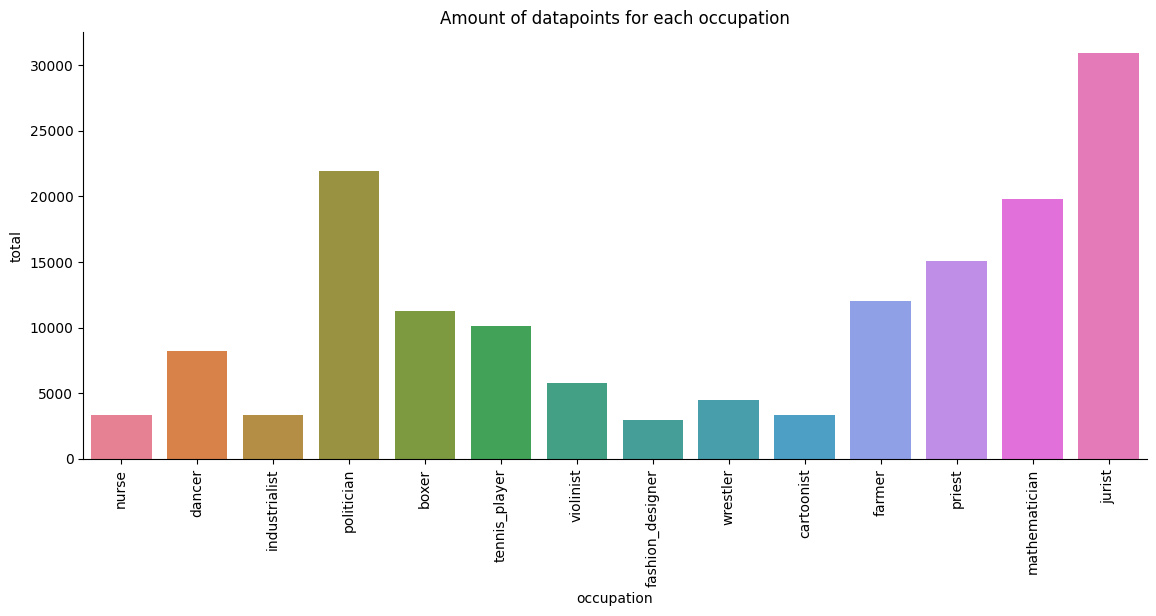

In [19]:
graph = sns.catplot(data=summary_statistics, x='occupation', y='total', kind='bar', aspect=7/3, hue='occupation')
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

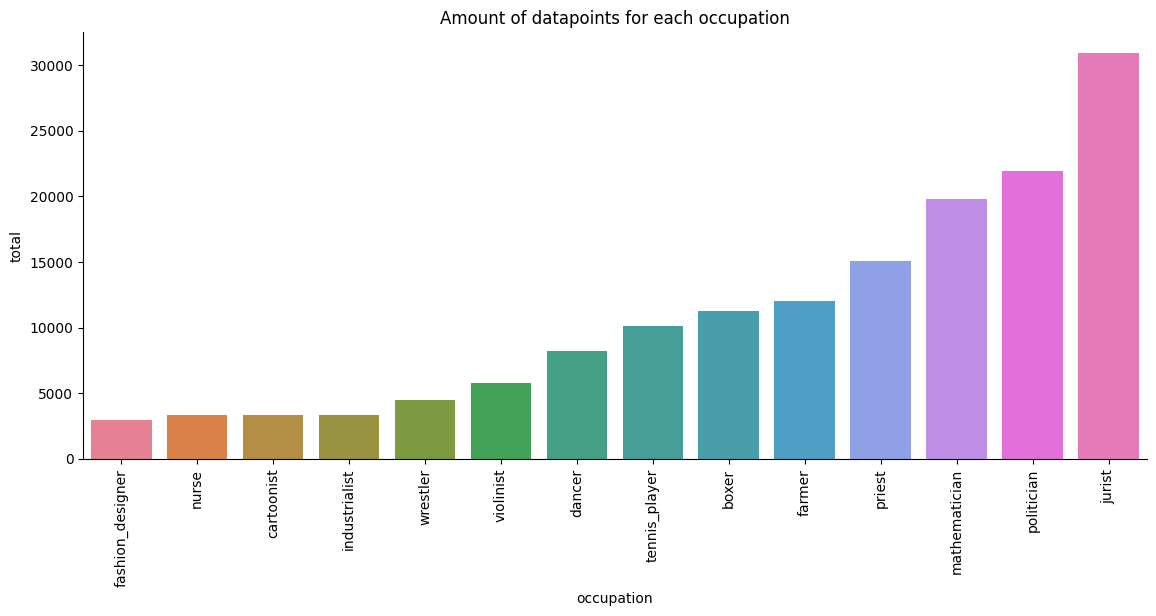

In [20]:
#distribution of datapoints
graph = sns.catplot(data=summary_statistics.sort_values(by=['total']), x='occupation', y='total', kind='bar', aspect=7/3, hue='occupation')
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

Visualize the distribution of the genders for each occupation. This gives a first impression of gender distributions in each occupation based on real/historical context.

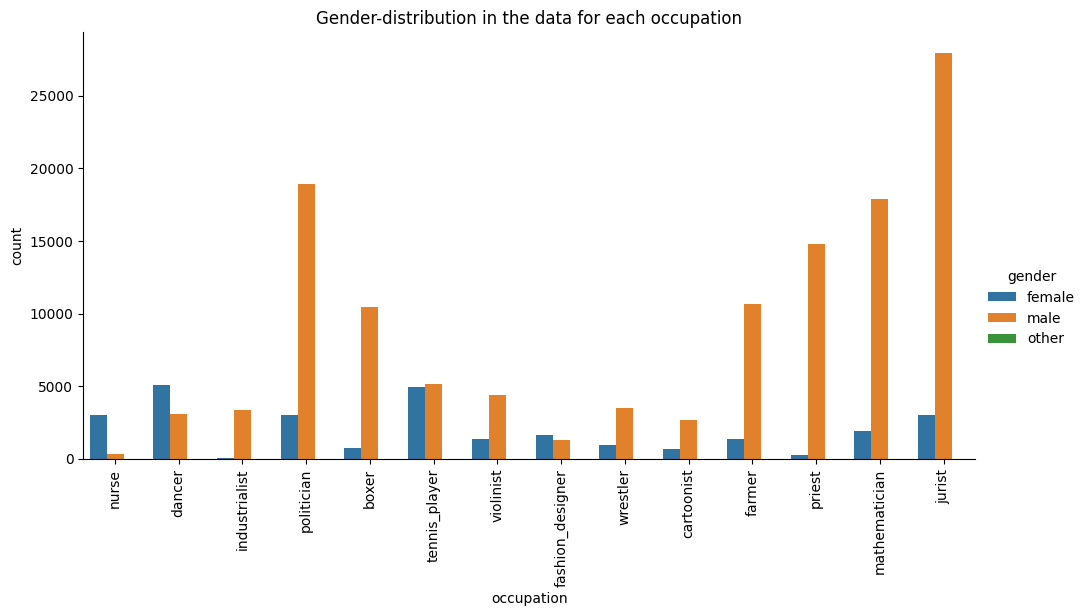

In [21]:
sns.catplot(data=consolidated_data, x='occupation', hue='gender', kind='count', aspect=2/1)
plt.title('Gender-distribution in the data for each occupation')
plt.xticks(rotation=90)
plt.show()

### Find deleted Occupations (from processing)

In [22]:
occ_list_old = import_occupations("data/occupations_extracted.csv")
for occ in occ_list_old:
    if occ not in occupations_list:
        print(occ)